In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions

%matplotlib inline

In [2]:
# load pre-trained Xception model

model = tf.keras.applications.xception.Xception(weights = 'imagenet', include_top=True)

# Summary of Xception Model
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7fb1d8c68e50>>


In [3]:
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x7fb1d8c68e50>>


#### Get labels for images

In [4]:
import requests

#fetching labels from Imagenet
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()
imgnet_map   # {'0': ['n01440764', 'tench'],   '1': ['n01443537', 'goldfish'], etc.

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [5]:
imgnet_num_from_label = {v[1]:k for k, v in imgnet_map.items()}
imgnet_num_from_label 

{'tench': '0',
 'goldfish': '1',
 'great_white_shark': '2',
 'tiger_shark': '3',
 'hammerhead': '4',
 'electric_ray': '5',
 'stingray': '6',
 'cock': '7',
 'hen': '8',
 'ostrich': '9',
 'brambling': '10',
 'goldfinch': '11',
 'house_finch': '12',
 'junco': '13',
 'indigo_bunting': '14',
 'robin': '15',
 'bulbul': '16',
 'jay': '17',
 'magpie': '18',
 'chickadee': '19',
 'water_ouzel': '20',
 'kite': '21',
 'bald_eagle': '22',
 'vulture': '23',
 'great_grey_owl': '24',
 'European_fire_salamander': '25',
 'common_newt': '26',
 'eft': '27',
 'spotted_salamander': '28',
 'axolotl': '29',
 'bullfrog': '30',
 'tree_frog': '31',
 'tailed_frog': '32',
 'loggerhead': '33',
 'leatherback_turtle': '34',
 'mud_turtle': '35',
 'terrapin': '36',
 'box_turtle': '37',
 'banded_gecko': '38',
 'common_iguana': '39',
 'American_chameleon': '40',
 'whiptail': '41',
 'agama': '42',
 'frilled_lizard': '43',
 'alligator_lizard': '44',
 'Gila_monster': '45',
 'green_lizard': '46',
 'African_chameleon': '47',


In [6]:
imgnet_label_from_num = {k:v[1] for k, v in imgnet_map.items()}
imgnet_label_from_num 

{'0': 'tench',
 '1': 'goldfish',
 '2': 'great_white_shark',
 '3': 'tiger_shark',
 '4': 'hammerhead',
 '5': 'electric_ray',
 '6': 'stingray',
 '7': 'cock',
 '8': 'hen',
 '9': 'ostrich',
 '10': 'brambling',
 '11': 'goldfinch',
 '12': 'house_finch',
 '13': 'junco',
 '14': 'indigo_bunting',
 '15': 'robin',
 '16': 'bulbul',
 '17': 'jay',
 '18': 'magpie',
 '19': 'chickadee',
 '20': 'water_ouzel',
 '21': 'kite',
 '22': 'bald_eagle',
 '23': 'vulture',
 '24': 'great_grey_owl',
 '25': 'European_fire_salamander',
 '26': 'common_newt',
 '27': 'eft',
 '28': 'spotted_salamander',
 '29': 'axolotl',
 '30': 'bullfrog',
 '31': 'tree_frog',
 '32': 'tailed_frog',
 '33': 'loggerhead',
 '34': 'leatherback_turtle',
 '35': 'mud_turtle',
 '36': 'terrapin',
 '37': 'box_turtle',
 '38': 'banded_gecko',
 '39': 'common_iguana',
 '40': 'American_chameleon',
 '41': 'whiptail',
 '42': 'agama',
 '43': 'frilled_lizard',
 '44': 'alligator_lizard',
 '45': 'Gila_monster',
 '46': 'green_lizard',
 '47': 'African_chameleon',


#### Get image

In [18]:
def get_num_str( num, max_digits=4 ):
    leading_zeros = int(max_digits - (np.trunc(np.log10(num))+1))
    return '0'*leading_zeros + str(num)


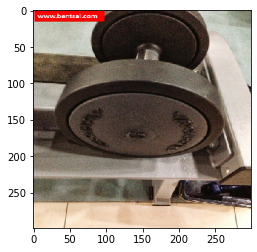

In [8]:
# load and pre-process image of a lion
import random

#IMAGE_PATH = 'data/lion.jpg'

path_prefix = 'data/ILSVRC/Data/DET/test/'
filename_stem ='ILSVRC2017_test_0000'
filename_suffix = '.JPEG'
file_number = rand_num = random.randint(1, 5500)   

IMAGE_PATH = path_prefix + filename_stem + get_num_str( rand_num ) + filename_suffix

img=tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(299, 299))
img=tf.keras.preprocessing.image.img_to_array(img)

# view the image
plt.imshow(img/255.)

In [9]:
# make model predictions

img = tf.keras.applications.xception.preprocess_input(img)

In [10]:
img.shape

(299, 299, 3)

In [11]:
prediction_array = model.predict(np.array([img]))

In [12]:
prediction_array

array([[6.12797274e-04, 4.55963949e-04, 3.64219130e-04, 6.05526555e-04,
        4.01473109e-04, 3.20938299e-04, 2.78708816e-04, 6.59174810e-04,
        3.69999907e-04, 2.01628442e-04, 4.01380501e-04, 5.80937776e-04,
        2.24266303e-04, 3.44100554e-04, 3.26793263e-04, 2.67207797e-04,
        3.59986821e-04, 4.57893038e-04, 6.87952328e-04, 3.71805450e-04,
        3.31489951e-04, 3.18034057e-04, 4.51089116e-04, 2.92971468e-04,
        5.40142995e-04, 4.38382267e-04, 6.20719162e-04, 4.36685921e-04,
        3.88499087e-04, 5.01141243e-04, 6.06605958e-04, 4.70916944e-04,
        4.05142986e-04, 3.95391369e-04, 4.78505506e-04, 4.00871737e-04,
        2.37595275e-04, 4.80039860e-04, 4.63840959e-04, 1.16659154e-03,
        6.37523772e-04, 3.10676143e-04, 6.53463125e-04, 4.18763957e-04,
        3.87406559e-04, 5.74008969e-04, 5.93091070e-04, 7.92019477e-04,
        7.41686323e-04, 2.63373135e-04, 5.20451111e-04, 1.20917139e-04,
        6.26464840e-04, 4.98314737e-04, 9.60281643e-04, 3.470843

In [13]:
prediction_decoded = decode_predictions(prediction_array, top=5)
prediction_decoded

[[('n03400231', 'frying_pan', 0.08108187),
  ('n03255030', 'dumbbell', 0.06774059),
  ('n02790996', 'barbell', 0.04971148),
  ('n03706229', 'magnetic_compass', 0.028000187),
  ('n03657121', 'lens_cap', 0.022497008)]]

In [14]:
prediction_decoded[0][0][1]

'frying_pan'

In [17]:
prediction_array.shape

(1, 1000)